In [1]:
from pre_processing import *
import os

### How to get target images
1. Read an original image `original.png` from file system (screen captured).
2. Re-capture the output image `target.png` w/ mobile camera.
3. Save the image as `source.png` in the same directory.

Reading original image :  data/mysnu\original.png


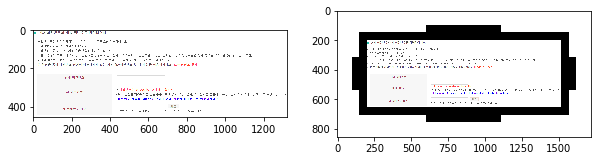

True

In [2]:
dirName = "data/mysnu"
imFilename = os.path.join(dirName, "original.png")

print("Reading original image : ", imFilename)
imOrg = cv2.imread(imFilename, cv2.IMREAD_COLOR)

pad = 50
WHITE = (255,255,255)
BLACK = (0,0,0)

imPad = cv2.copyMakeBorder(imOrg, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=BLACK)
imPad = cv2.copyMakeBorder(imPad, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=WHITE)
height, width, _ = imPad.shape
imPad[:pad, width//3:width*2//3] = BLACK
imPad[-pad:, width//3:width*2//3] = BLACK
imPad[height//3:height*2//3, :pad] = BLACK
imPad[height//3:height*2//3, -pad:] = BLACK
imPad = cv2.copyMakeBorder(imPad, pad*2, pad*2, pad*2, pad*2, cv2.BORDER_CONSTANT, value=WHITE)

fig, axes = plt.subplots(ncols=2,figsize=(10,5))
axes[0].imshow(imOrg)
axes[1].imshow(imPad)
plt.show()

cv2.imwrite(os.path.join(dirName, "target.png"), imPad)

### How to crop source images & evaluate image similarity
1. Read the screen captured image, `target.png` and the mobile re-capture image, `source.png`.
2. Crop image and save them as `*_cropped.png` w/ homography.
3. Evaluate image similarity w. metrics like MSE, PSNR, SSIM.

In [17]:
dirName = "data/snipping"
imFilename = os.path.join(dirName, "source.png")
refFilename = os.path.join(dirName, "target.png")

print("Reading reference image : ", refFilename)
imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

print("Reading image to align : ", imFilename);  
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

Reading reference image :  data/snipping\target.png
Reading image to align :  data/snipping\source.png


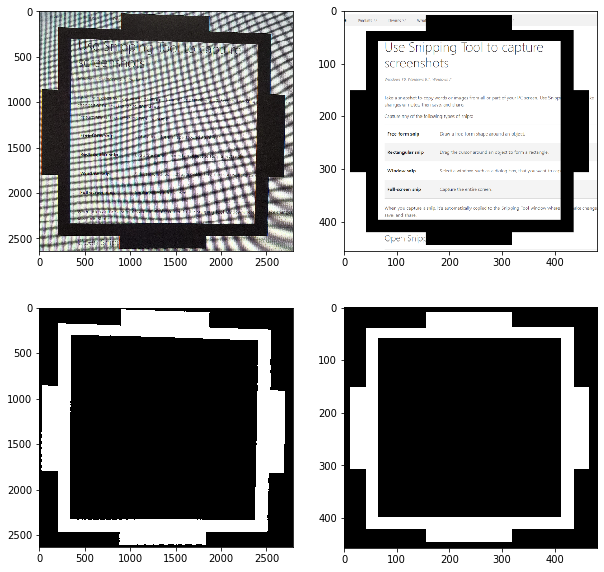

In [18]:
_, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
ax[0,0].imshow(im)
ax[0,1].imshow(imReference)
ax[1,0].imshow(Frame(im, 70), 'gray')
ax[1,1].imshow(Frame(imReference), 'gray')
plt.show()

[[ 354  304]
 [2411  369]
 [2373 2339]
 [ 343 2331]]
[[ 63  59]
 [411  59]
 [410 398]
 [ 63 397]]


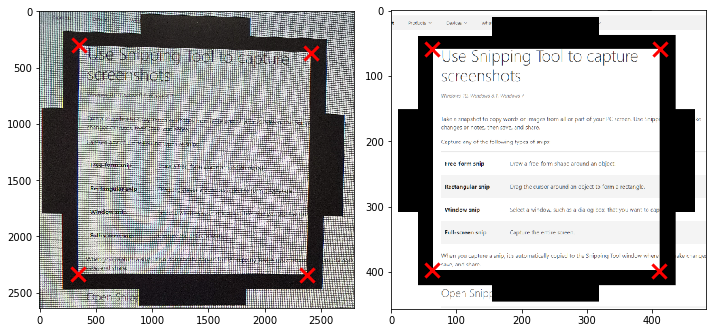

In [19]:
src, tar = CropImage(im, imReference)

In [ ]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

mse = mean_squared_error(src, tar)
psnr = peak_signal_noise_ratio(src, tar)
ssim = structural_similarity(src, tar, multichannel=True)

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax[0].imshow(src)
ax[0].set_title('Source')
ax[1].imshow(tar)
ax[1].set_title('Target')
ax[2].imshow(np.abs(src-tar))
ax[2].set_title(f'MSE:{round(mse,2)}, PSNR:{round(psnr,2)}, SSIM:{round(ssim,2)}')
plt.show()

cv2.imwrite(os.path.join(dirName, "source_cropped.png"), src)
cv2.imwrite(os.path.join(dirName, "target_cropped.png"), tar)